# Dataset import

In [1]:
# Math and linear algebra
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import math
import numpy as np

# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Utils
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
import gc

FLAG_EXPORT = True
FLAG_DEBUG = False
out_path = 'assets/'

In [2]:
# Import training dataset
raw = pd.read_csv (out_path+'dataset_merged.csv', header=0)

In [3]:
from sklearn.model_selection import train_test_split

X = raw.drop('p3', axis=1)
y = raw ['p3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)
# SEMPRE faça um workflow reproduzível, e pra isso o slit precisa de random_state

10

In [4]:
def regression_report (y_hat, y_test, alpha=0.05, title="Model Evaluation"):
    print ("MAE:                ", metrics.mean_absolute_error(y_test, y_hat))
    print ("RMSE:               ", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
    print ("Percentual:         ", metrics.mean_absolute_error(y_test,y_hat)/y_test.mean()*100, "%")

    # Previsto vs real
    line = np.arange(np.min([y_test, y_hat]),
                     np.max([y_test, y_hat]),
                     1)

    plt.scatter(y_test,y_hat, Alpha=alpha)
    plt.scatter(line,line, marker='.')
    plt.grid(True)
    plt.title(title)
    plt.xlabel("Real values")
    plt.ylabel("Predicted values")

# Extremey randomized trees
* To 85k points, it runs in 1 min


In [8]:
from sklearn.ensemble import ExtraTreesRegressor

In [9]:
if FLAG_DEBUG:
    mae1 = {}
    mae2 = {}
    for k in range(1,25, 2):
        model = ExtraTreesRegressor(max_depth=k, 
                                    n_estimators=200, 
                                    bootstrap=True, 
                                    max_samples=0.9).fit(X_train,y_train)
        y_hat = model.predict(X_train)
        mae1[k] = metrics.mean_absolute_error(y_train,y_hat)
        y_hat = model.predict(X_test)
        mae2[k] = metrics.mean_absolute_error(y_test,y_hat)

    plt.figure()
    plt.plot(list(mae1.keys()), list(mae1.values()), label='Training dataset error')
    plt.plot(list(mae2.keys()), list(mae2.values()), label='Validation dataset error')
    plt.legend(loc='lower left')
    plt.xlabel("Maximun height")
    plt.ylabel("MAE")
    plt.grid(True)

MAE:                 10.085271119916975
RMSE:                18.63758695770727
Percentual:          5.5182255398918505 %


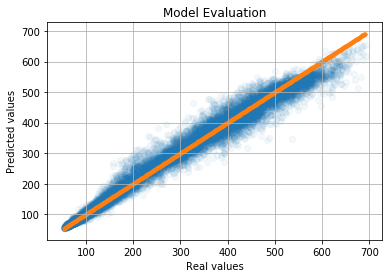

In [13]:
model2 = ExtraTreesRegressor(max_depth=25,
                             n_estimators=400,
                             #max_features=(int)(X_train.shape[1]*k),
                             bootstrap=True,
                             max_samples=0.7)
model2.fit(X_train,y_train)

# TEST
y_hat = model2.predict(X_test)
regression_report (y_hat, y_test)
if FLAG_EXPORT: 
    plt.savefig(out_path + 'graph_error_2.eps')
    with open(out_path + 'model2.joblib', 'wb') as file: dump(model2, file)